In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()
sns.color_palette(n_colors=20)
pd.options.display.max_rows = 999

In [3]:
path = "../calculations/"
df = pd.read_csv(path+"7agnr_scaling.csv")

In [4]:
low_e_df = df[df['U'] < 2.0]
high_e_df = df[df['U'] > 1.7]

In [5]:
#print(df)

## singlet/triplet difference

y-axis: singlet-triplet diff
x-axis: length

In [6]:
def plot_energy_diff(df, energy):
    multi_df = df.copy()
    multi_df.drop(columns='magnetization', inplace=True)

    multi_df.set_index(['M', 'U', 'length'], inplace=True)
    multi_df.sort_index(inplace=True)
    
    num_entries = int(len(df)/2)
    
    energy_diffs = multi_df.diff(periods=num_entries)[num_entries:]
    energy_diffs.reset_index(['M'], inplace=True)
    energy_diffs.drop(columns='M', inplace=True)
    
    energy_df = energy_diffs.pivot_table('energy', index='length', columns='U')
    energy_df.index.names = ['Length']
    
    energy_df.drop(energy_df.index[10:16], inplace=True)
    #print(energy_df)
    
    fig, ax = plt.subplots()
    ax.set_ylabel("Energy Difference")
    ax.set_xticks(np.arange(1,11))
    energy_df.plot(figsize=(12,8), title=f"Singlet-Triplet Solution Difference for 7 AGNR with {energy} U", ax=ax)
    plt.savefig(f"../figures/figures_7agnr/singlet_triplet_{energy}_energy.pdf")

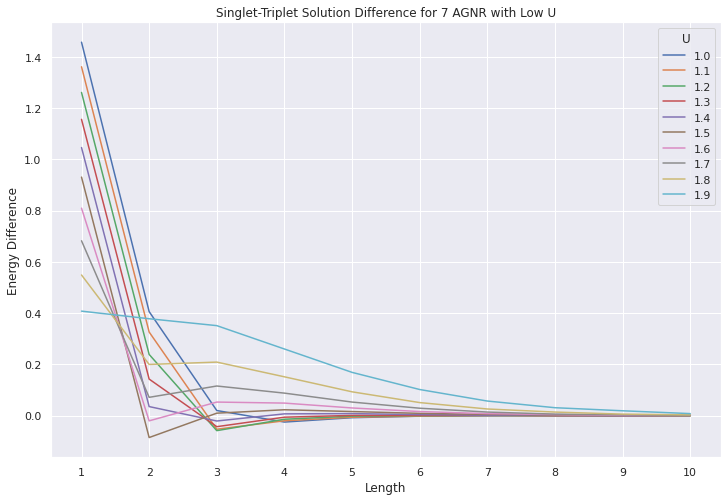

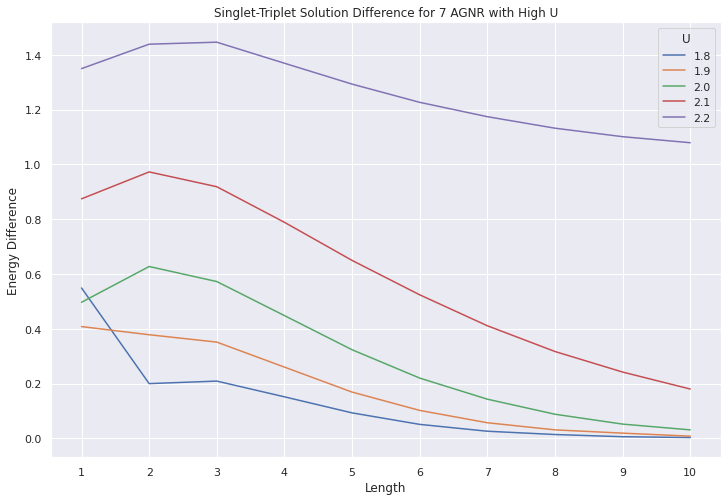

In [7]:
plot_energy_diff(low_e_df, "Low")
plot_energy_diff(high_e_df, "High")

## total absolute magnetization vs varying U

Vary length of ANGR

In [8]:
def plot_magnetization(df, multiplicity):
    
    mag_df = df
    mag_df.drop(columns='energy', inplace=True)

    mag_df.set_index(['M', 'U', 'length'], inplace=True)
    mag_df.sort_index(inplace=True)
    
    num_entries = int(len(df)/2)
    
    mag_df = mag_df.pivot_table('magnetization', index='U', columns='length')
    #print(mag_df)
    fig, ax = plt.subplots()
    ax.set_ylabel("Total Absolute Magnetization")
    ax.set_ylim(-1,21)
    #plt.xticks(labels=['1.0', '1.3', '1.6', '1.7', '1.8', '1.9'])
    mag_df.plot(figsize=(12,8), title=f"7 AGNR Total Absolute Magnetization for {multiplicity} Solution", ax=ax)
    plt.savefig(f"../figures/figures_7agnr/{multiplicity}_magnetization.pdf")

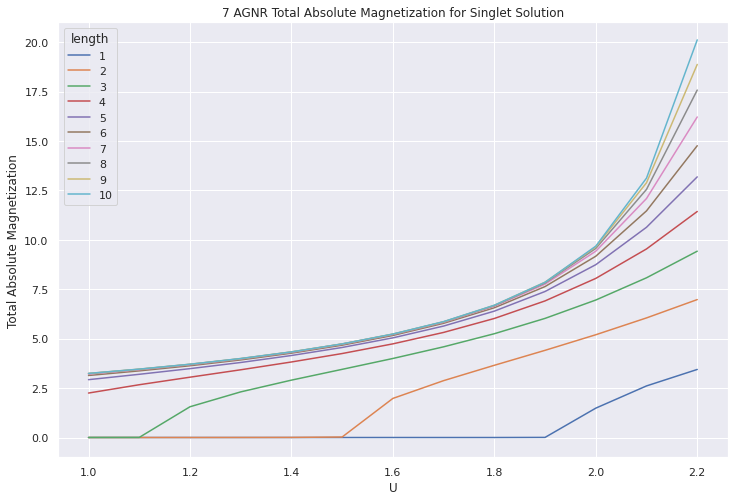

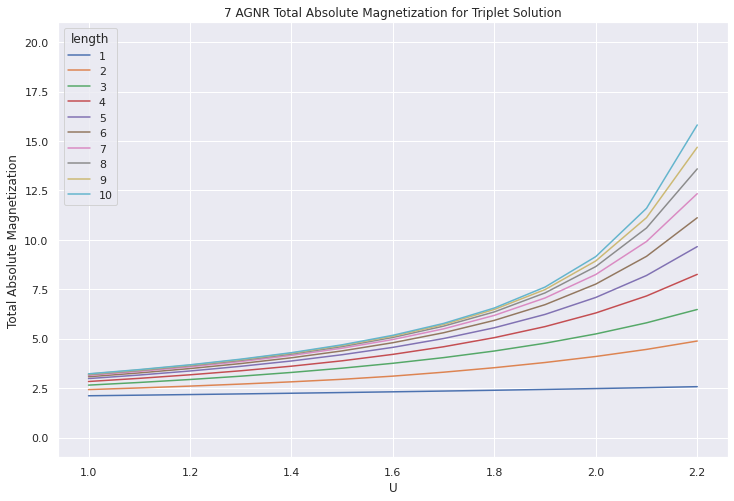

In [9]:
mag_df = df.copy()
mag_df = mag_df[mag_df['M'] == 1]
mag_df = mag_df[mag_df['length'] < 11]
plot_magnetization(mag_df, 'Singlet')

mag_df = df.copy()
mag_df = mag_df[mag_df['M'] == 3]
mag_df = mag_df[mag_df['length'] < 11]
plot_magnetization(mag_df, 'Triplet')